PV-202 Aladib Yazan

Laboratory Work №3. Principal Component Analysis Method

Data on mortality in heart failure cases (heart_failure_clinical_records_dataset.csv)

In [1]:
import pandas as pd

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
deaths = df['DEATH_EVENT']
df = df.drop(columns=['time', 'DEATH_EVENT'])
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


Auxiliary functions for visualization

In [2]:
from matplotlib.colors import Normalize, to_rgb
from pandas import DataFrame
import matplotlib.cm as cm
from matplotlib import pyplot as plt


def visualize(data_frame: DataFrame, x_name, y_name, x_label, y_label, colors):
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    for index, row in data_frame.iterrows():
        plt.plot(row[x_name], row[y_name], marker='x' if deaths[index] else 'o', color=colors[index])

    plt.show()


def print_graphics(data_frame, clustering_labels=None):
    if clustering_labels is not None:
        norm = Normalize(vmin=0, vmax=max(clustering_labels))
        mapping = cm.ScalarMappable(norm=norm, cmap=cm.hot)

        colors = [mapping.to_rgba(cluster_num) for cluster_num in clustering_labels]
    else:
        colors = [to_rgb(123) for _ in range(len(data_frame))]

    visualize(data_frame, 'ejection_fraction', 'creatinine_phosphokinase', 'Ejection Fraction', 'Creatine Kinase', colors)
    visualize(data_frame, 'ejection_fraction', 'platelets', 'Ejection Fraction', 'Platelets', colors)
    visualize(data_frame, 'serum_sodium', 'platelets', 'Serum Sodium', 'Platelets', colors)


Clustering from Lab №2

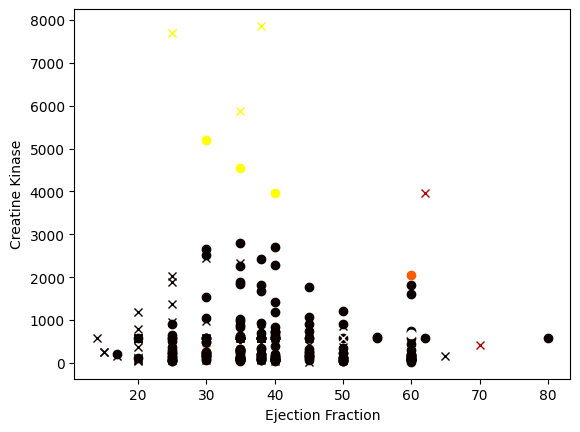

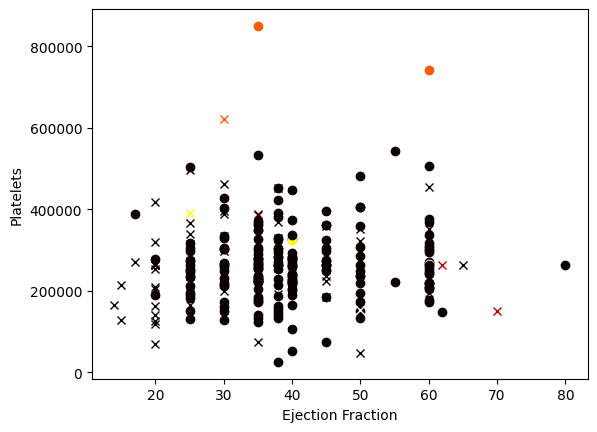

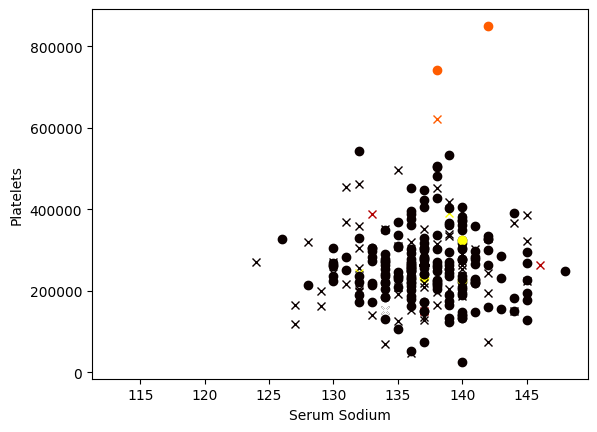

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

data = StandardScaler().fit_transform(df.values)
clustering_2_lab = AgglomerativeClustering(n_clusters=5, metric='mahalanobis', linkage='complete')
clustering_2_lab.fit(data)

print_graphics(df, clustering_2_lab.labels_)

Clustering with preprocessing using Principal Component Analysis (PCA)

Function implementing clustering with preprocessing of data by PCA:

In [4]:
from sklearn.decomposition import PCA


def pca_clustering(dataframe, n_components: int, n_clusters: int = 5):
    scaler = StandardScaler()
    pca = PCA(n_components=n_components)
    data = pca.fit_transform(scaler.fit_transform(dataframe.values))

    clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='mahalanobis', linkage='complete')
    clustering.fit(data)

    return clustering

Clustering with PCA (2 components)

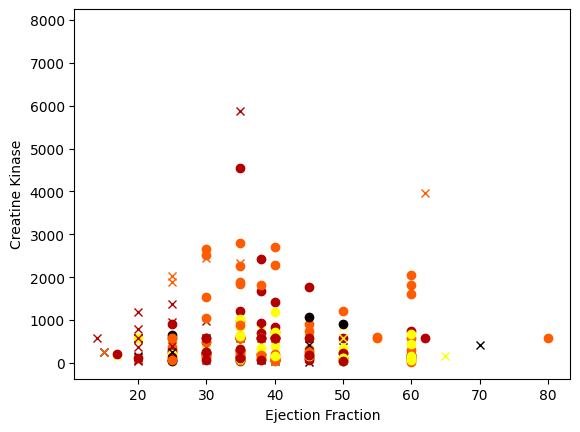

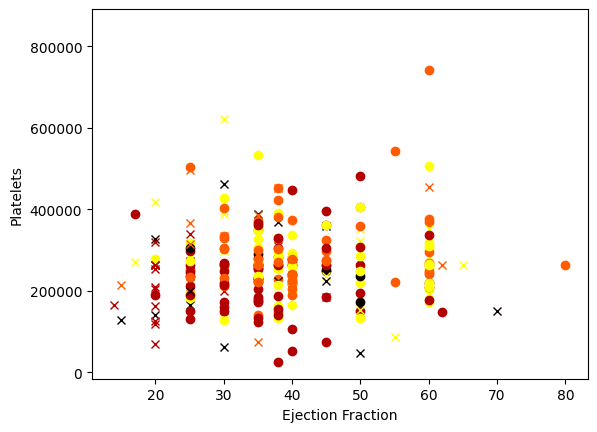

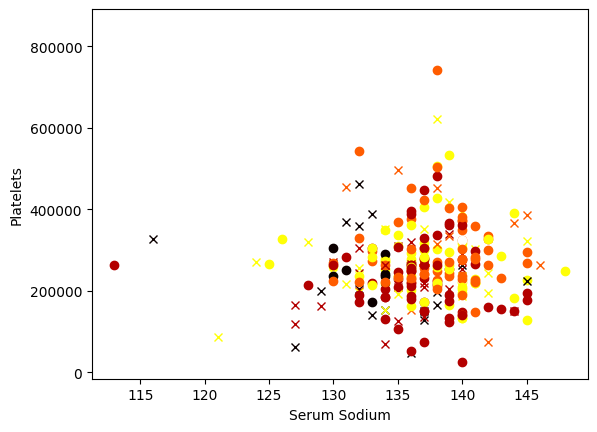

In [5]:
clustering_pca_2 = pca_clustering(df, 2)

print_graphics(df, clustering_pca_2.labels_)

Clustering with PCA (5 components)

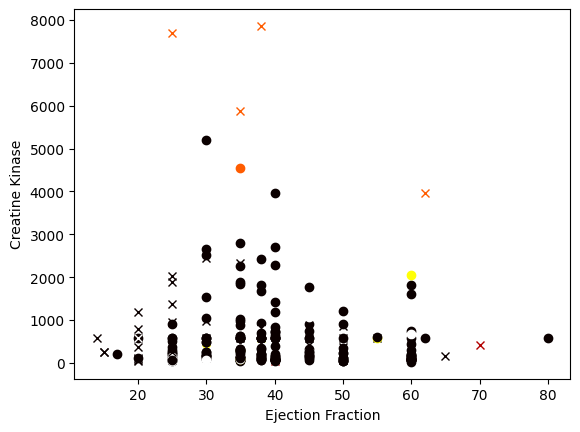

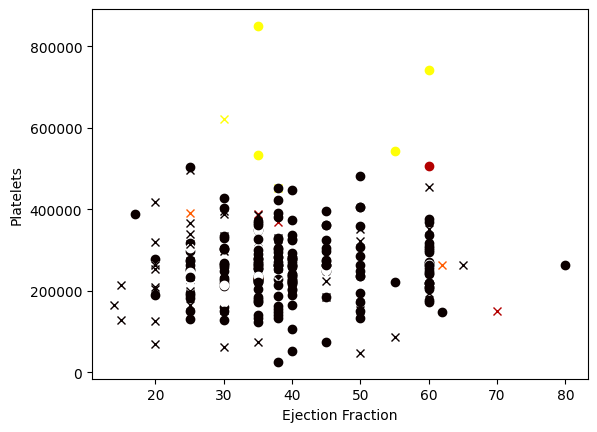

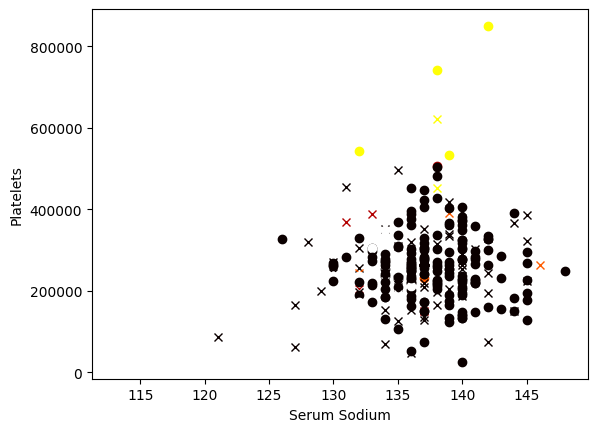

In [6]:
clustering_pca_5 = pca_clustering(df, 5)
print_graphics(df, clustering_pca_5.labels_)

Evaluation of clustering quality

In [7]:
from typing import Tuple
from typing import List
from sklearn.metrics import davies_bouldin_score, silhouette_score

metrics = [
    ('Davies-Bouldin Index', davies_bouldin_score),
    ('Silhouette Coefficient', silhouette_score),
]


def score_clustering(data_frame: DataFrame, clusterings: List[Tuple[str, AgglomerativeClustering]]) -> DataFrame:
    scores = []

    for metric in metrics:
        scores.append([metric[1](data_frame.values, clustering[1].labels_) for clustering in clusterings])

    return DataFrame(
        scores,
        columns=[clustering[0] for clustering in clusterings],
        index=[metric[0] for metric in metrics]
    )


score_clustering(df, [
    ('Lab 2', clustering_2_lab),
    ('PCA Method (2 components)', clustering_pca_2),
    ('PCA Method (5 components)', clustering_pca_5),
])

,Lab 2,PCA Method (2 components),PCA Method (5 components)
Davies-Bouldin Index,9.610180,25.665643,6.313233
Silhouette Coefficient,-0.177095,-0.083106,-0.216043


Silhouette Score (Silhouette Coefficient) – this is an evaluation metric that gives a result in the range from -1 to 1.

A score close to 1 means the data point is well clustered within its group and far from others.

A score close to -1 means poor or wrong clustering.

A score close to 0 means overlapping clusters.

Davies-Bouldin Index – this is defined as the average similarity between each cluster and its most similar one. Similarity is the ratio of intra-cluster distance to inter-cluster distance.

Lower values mean better clustering.

The minimum score is 0.